In [14]:
import re
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import torch
from transformers import BertForSequenceClassification, BertTokenizer
from transformers.file_utils import is_tf_available, is_torch_tpu_available, is_torch_available
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\timio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [141]:
# fake = pd.read_csv(r'fake.csv')
# fake.drop(['title', 'subject', 'date'], axis=1, inplace=True)
# fake.insert(1, column = "class", value = "Fake")
# fake

,text,class
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake
...,...,...
23476,21st Century Wire says As 21WIRE reported earl...,Fake
23477,21st Century Wire says It s a familiar theme. ...,Fake
23478,Patrick Henningsen 21st Century WireRemember ...,Fake
23479,21st Century Wire says Al Jazeera America will...,Fake


In [142]:
# fake1 = pd.read_csv(r'fake1.csv')
# fake1.drop(fake1.columns[0],axis=1, inplace=True)
# fake1.insert(1, column = "class", value = "Fake")
# fake1

,text,class
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake
...,...,...
43637,The USA wants to divide Syria.\r\n\r\nGreat Br...,Fake
43638,The Ukrainian coup d'etat cost the US nothing ...,Fake
43639,The European Parliament falsifies history by d...,Fake
43640,The European Parliament falsifies history by d...,Fake


In [143]:
# true = pd.read_csv(r'true.csv')
# true.drop(["title", "subject", "date"], axis = 1, inplace=True)
# true.insert(1, column = "class", value = "Real")
# true

,text,class
0,WASHINGTON (Reuters) - The head of a conservat...,Real
1,WASHINGTON (Reuters) - Transgender people will...,Real
2,WASHINGTON (Reuters) - The special counsel inv...,Real
3,WASHINGTON (Reuters) - Trump campaign adviser ...,Real
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,Real
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,Real
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",Real
21414,MINSK (Reuters) - In the shadow of disused Sov...,Real
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,Real


In [144]:
# true1 = pd.read_csv(r'true1.csv')
# true1.drop(true1.columns[0], axis=1, inplace=True)
# true1.insert(1, column = "class", value = "Real")
# true1

,text,class
0,The head of a conservative Republican faction ...,Real
1,Transgender people will be allowed for the fir...,Real
2,The special counsel investigation of links bet...,Real
3,Trump campaign adviser George Papadopoulos tol...,Real
4,President Donald Trump called on the U.S. Post...,Real
...,...,...
34970,Most conservatives who oppose marriage equalit...,Real
34971,The freshman senator from Georgia quoted scrip...,Real
34972,The State Department told the Republican Natio...,Real
34973,"ADDIS ABABA, Ethiopia —President Obama convene...",Real


In [145]:
# mixed = pd.read_csv(r'train.csv')
# mixed.drop(mixed.columns[[0, 1, 3, 4, 6]], axis=1, inplace=True)
# mixed

,text,class
0,That s what we re talking about! Another campa...,Fake
1,How is it that Sean Hannity is the only media ...,Fake
2,Almost immediately after learning that longtim...,Fake
3,MOSCOW (Reuters) - For all their mutual praise...,Real
4,WASHINGTON (Reuters) - The Trump administratio...,Real
...,...,...
39995,(Reuters) - Republican vice presidential candi...,Real
39996,An employee working at a North Carolina McDona...,Fake
39997,Tucker to sanctuary city supporter: how did a ...,Fake
39998,Consortium News Exclusive: The U.S. mainstream...,Fake


In [146]:
# train_data = pd.concat([fake, fake1, true, true1, mixed])
# #train_data.to_csv("combined.csv")
# train_data

,text,class
0,Donald Trump just couldn t wish all Americans ...,Fake
1,House Intelligence Committee Chairman Devin Nu...,Fake
2,"On Friday, it was revealed that former Milwauk...",Fake
3,"On Christmas day, Donald Trump announced that ...",Fake
4,Pope Francis used his annual Christmas Day mes...,Fake
...,...,...
39995,(Reuters) - Republican vice presidential candi...,Real
39996,An employee working at a North Carolina McDona...,Fake
39997,Tucker to sanctuary city supporter: how did a ...,Fake
39998,Consortium News Exclusive: The U.S. mainstream...,Fake


In [175]:
train_data['class'] = train_data['class'].map({'Fake':0, 'Real':1})



In [147]:
# print(train_data[train_data['class'].str.contains("February 5, 2017")])

                              text             class
504   Is Impeachment Next? (VIDEO)  February 5, 2017


In [148]:
# train_data2 = train_data.drop([504], inplace=True)


In [149]:
# print(train_data[train_data['class'].str.contains("February 5, 2017")])

Empty DataFrame
Columns: [text, class]
Index: []


In [16]:
train_data = pd.read_csv(r'new dataset.csv')
train_data = train_data.loc[:, ~train_data.columns.str.contains('^Unnamed')]
train_data

,text,class
0,"Ever since Hillary Clinton generously, yet cor...",0
1,The MH17 was guided by the UA air traffic cont...,0
2,The Obama administration recently sent a missi...,0
3,Tickets to the fundraiser for Hillary hosted b...,0
4,"Today, President Obama endorsed Hillary Clinto...",0
...,...,...
29995,WASHINGTON (Reuters) - An influential U.S. Hou...,1
29996,"RANCHO MIRAGE, Calif. (Reuters) - U.S. Preside...",1
29997,(Reuters) - U.S. House Speaker Paul Ryan said ...,1
29998,BEIRUT (Reuters) - Syrian rebels urged Preside...,1


In [19]:
#Shuffling data
train_data = train_data.sample(frac=1).reset_index(drop=True)
train_data



,text,class
0,21st Century Wire says A group of top Silicon ...,0
1,Paul Ryan said that the House would implement ...,0
2,About 66 million people are forcibly displaced...,1
3,If you ve been on the email list for President...,0
4,Berlin (Reuters) - Germany said on Friday it h...,1
...,...,...
29995,The former CEO of a local cybersecurity firm i...,0
29996,"MOSCOW (Reuters) - Mikhail Gorbachev, the last...",1
29997,Imagine being a woman going to a university wh...,0
29998,WASHINGTON (Reuters) - Ohio’s Republican gover...,1


In [20]:
 train_data.isnull().sum()

text     0
class    0
dtype: int64

In [152]:
# train_data1 = train_data.dropna(inplace=True)
# train_data1

In [156]:
# train_data.isnull().sum()

text     0
class    0
dtype: int64

In [157]:
# train_data

,text,class
0,"Ever since Hillary Clinton generously, yet cor...",Fake
1,WASHINGTON (Reuters) - President-elect Donald ...,Real
2,Paul Ryan is all over Twitter chanting repeal...,Fake
3,WASHINGTON (Reuters) - U.S. Secretary of State...,Real
4,WASHINGTON (Reuters) - Fujifilm Medical System...,Real
...,...,...
163476,MOSCOW (Reuters) - Russian President Vladimir ...,Real
163477,14 are believed to have been killed and over 3...,Real
163478,BEIRUT (Reuters) - Islamic State suicide attac...,Real
163479,Just In Case: Preparing for the Evening and Da...,Fake


In [158]:
# # train_data1 = train_data[:99000]
# # train_data1

# train_data1 = train_data.drop(train_data.index[50000:163480], inplace=True)
# train_data

,text,class
0,"Ever since Hillary Clinton generously, yet cor...",Fake
1,WASHINGTON (Reuters) - President-elect Donald ...,Real
2,Paul Ryan is all over Twitter chanting repeal...,Fake
3,WASHINGTON (Reuters) - U.S. Secretary of State...,Real
4,WASHINGTON (Reuters) - Fujifilm Medical System...,Real
...,...,...
49996,Sources say that Chris Christie was offered se...,Fake
49997,Whoa! We asked the question yesterday in more ...,Fake
49998,Videos New Lawsuit Challenges Efforts To Stamp...,Fake
49999,"Oh look Hillary s considering a lying, opportu...",Fake


In [161]:
# train_data1 = train_data.drop(train_data.index[50000], inplace=True)


In [162]:
# train_data

,text,class
0,"Ever since Hillary Clinton generously, yet cor...",Fake
1,WASHINGTON (Reuters) - President-elect Donald ...,Real
2,Paul Ryan is all over Twitter chanting repeal...,Fake
3,WASHINGTON (Reuters) - U.S. Secretary of State...,Real
4,WASHINGTON (Reuters) - Fujifilm Medical System...,Real
...,...,...
49995,"During Friday’s Weekly Address, President Trum...",Real
49996,Sources say that Chris Christie was offered se...,Fake
49997,Whoa! We asked the question yesterday in more ...,Fake
49998,Videos New Lawsuit Challenges Efforts To Stamp...,Fake


In [21]:
train_data.to_csv("new dataset.csv")
#train_data

In [22]:
# Data Preprocessing
def preprocessing_data(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')
    words = re.sub(r'[^\w\s]', '', text).split()
    text = ' '.join([nltk.stem.WordNetLemmatizer().lemmatize(word) for word in words if word not in stopwords.words('english')])
    
    return text
    

In [23]:
train_data["text"] = train_data.text.apply(preprocessing_data)

<AxesSubplot:xlabel='class', ylabel='count'>

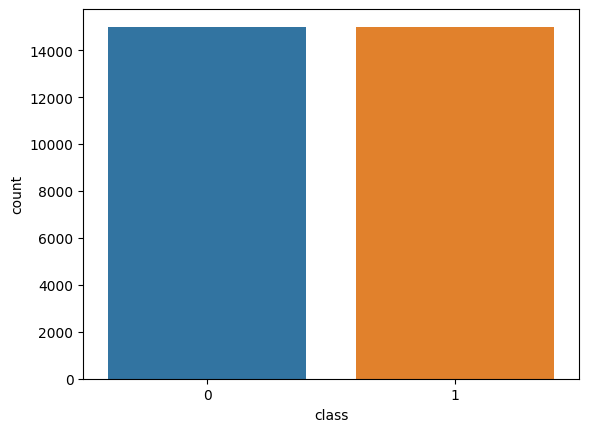

In [25]:
sns.countplot(data = train_data, x = 'class')    

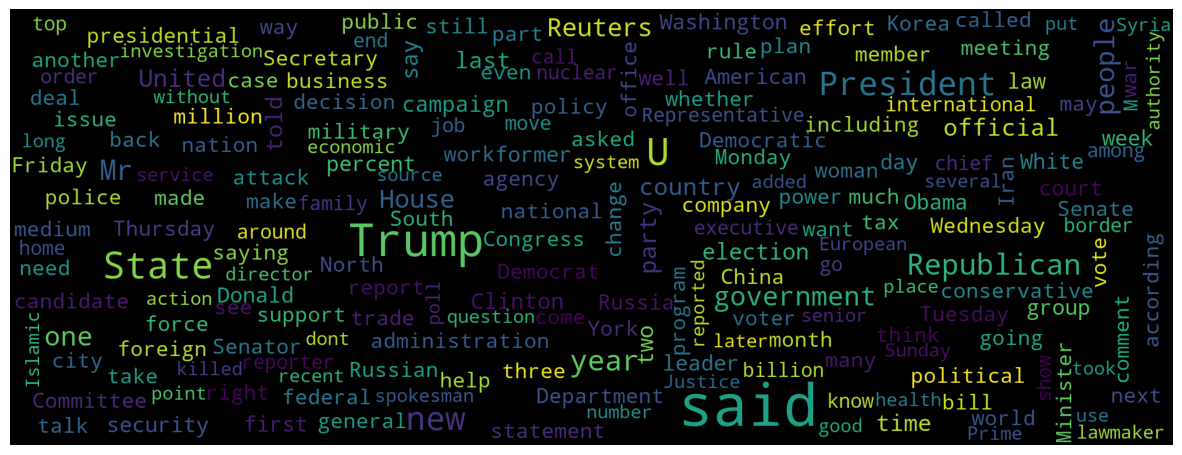

In [26]:
realCloud = ' '.join(train_data[train_data['class'] == 1]['text'])
words_cloud = WordCloud(background_color='black', min_font_size = 10, max_font_size = 100, include_numbers = False, collocations=False, width=2000, height=750)
plt.figure(figsize=(15, 30))
plt.imshow(words_cloud.generate(realCloud))
plt.axis('off')
plt.show()

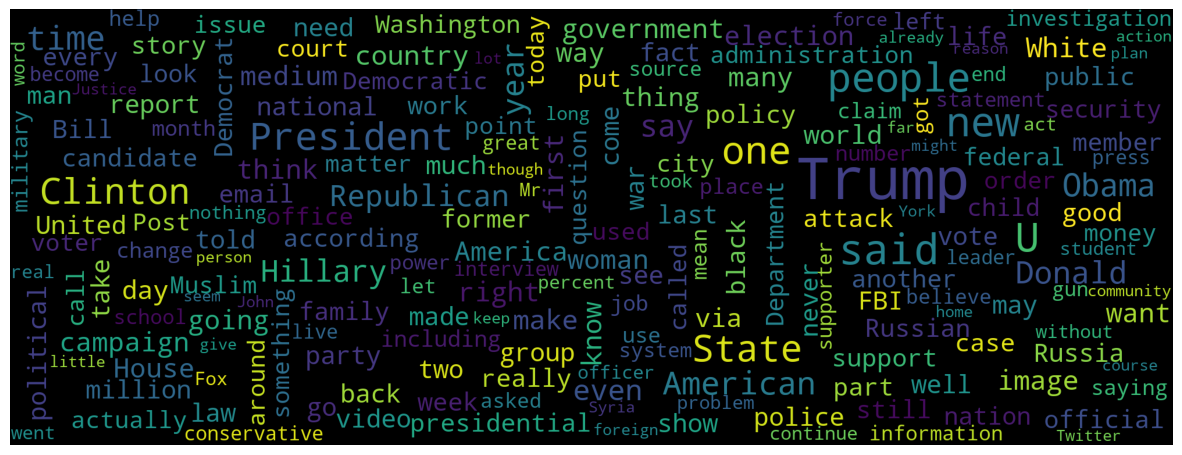

In [27]:
fakeCloud = ' '.join(train_data[train_data['class'] == 0]['text'])
words_cloud = WordCloud(background_color='black', min_font_size = 10, max_font_size = 100, include_numbers = False, collocations=False, width=2000, height=750)
plt.figure(figsize=(15, 30))
plt.imshow(words_cloud.generate(fakeCloud))
plt.axis('off')
plt.show()

In [34]:
import matplotlib.pyplot as plt

def n_grams(corpus, ylabel, title, n=2):
    ngrams_corpus = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:10]
    ngrams_corpus.sort_values().plot.barh(width=.8, color='cyan', figsize=(15, 10))
    plt.xlabel('Frequency')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
    

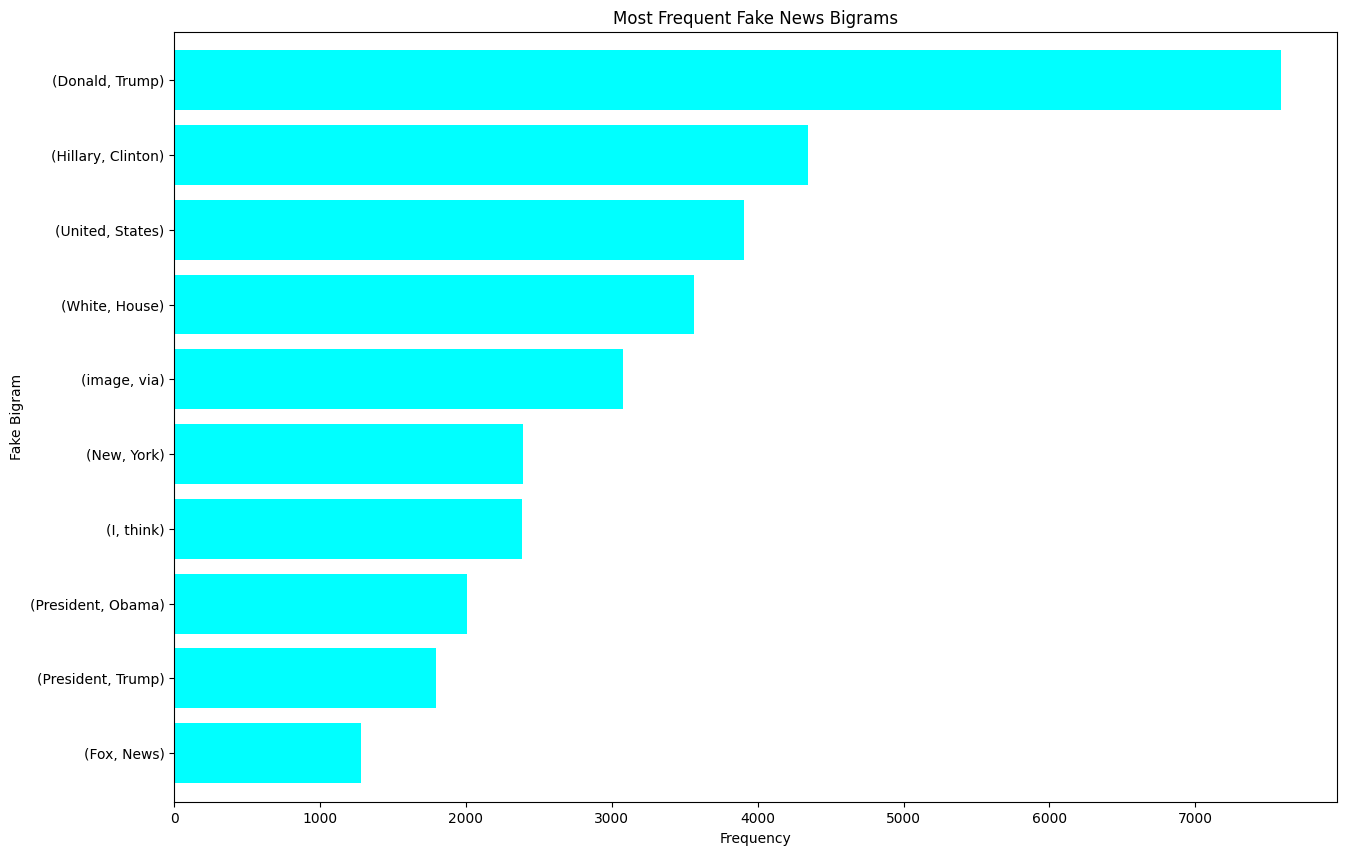

In [35]:
n_grams(fakeCloud, 'Fake Bigram', 'Most Frequent Fake News Bigrams', n=2)

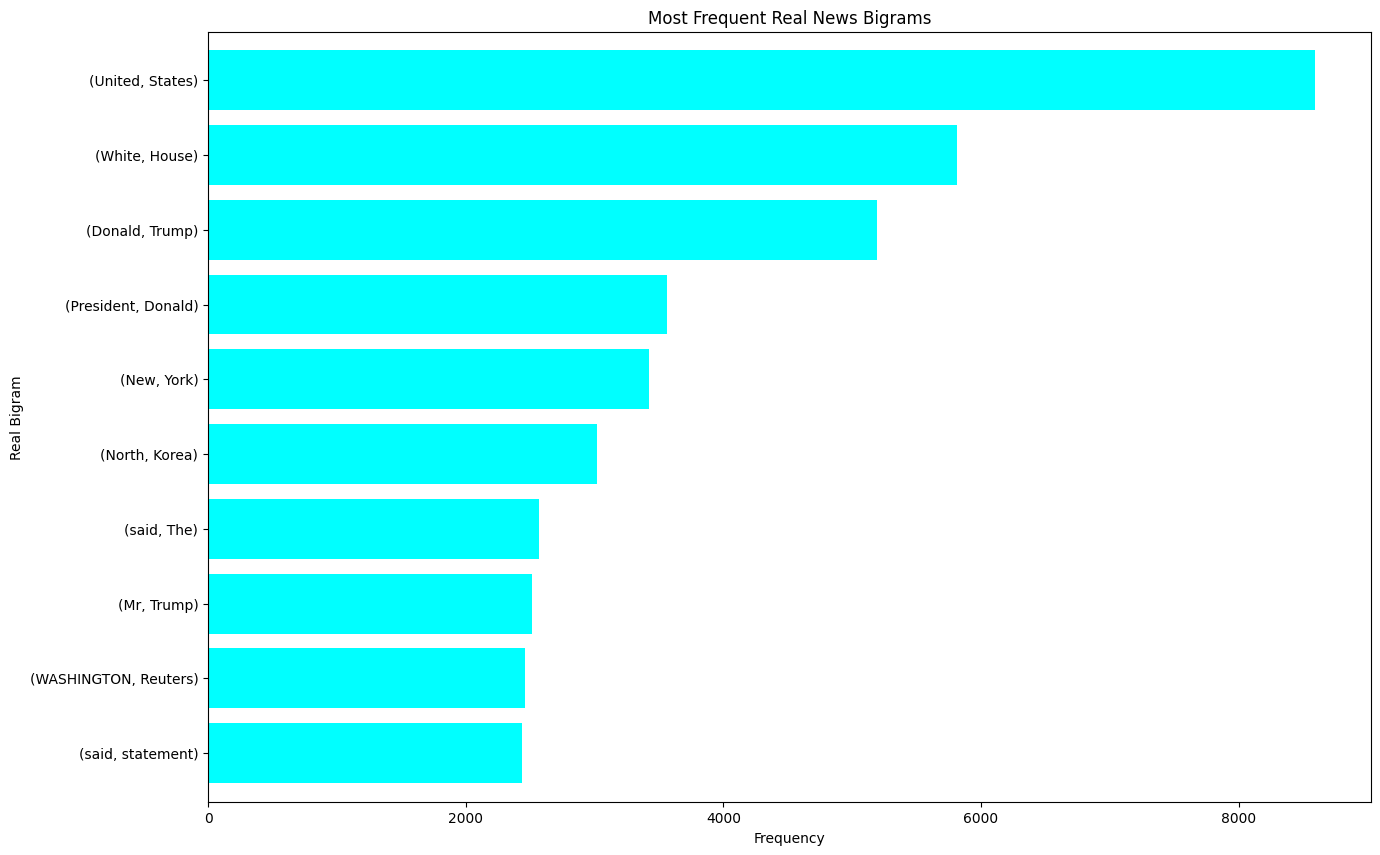

In [36]:
n_grams(realCloud, 'Real Bigram', 'Most Frequent Real News Bigrams', n=2)

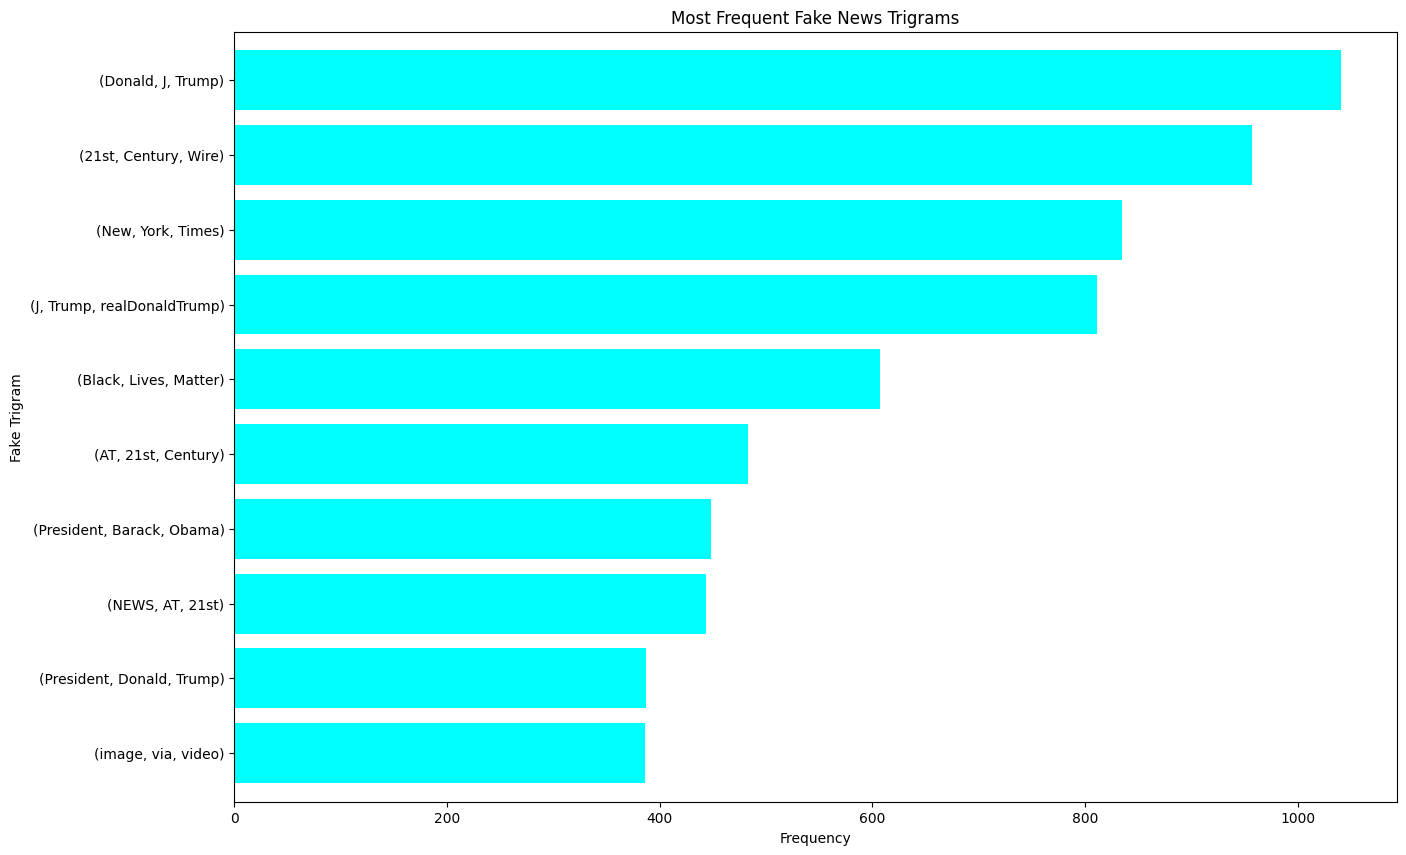

In [37]:
n_grams(fakeCloud, 'Fake Trigram', 'Most Frequent Fake News Trigrams', n=3)

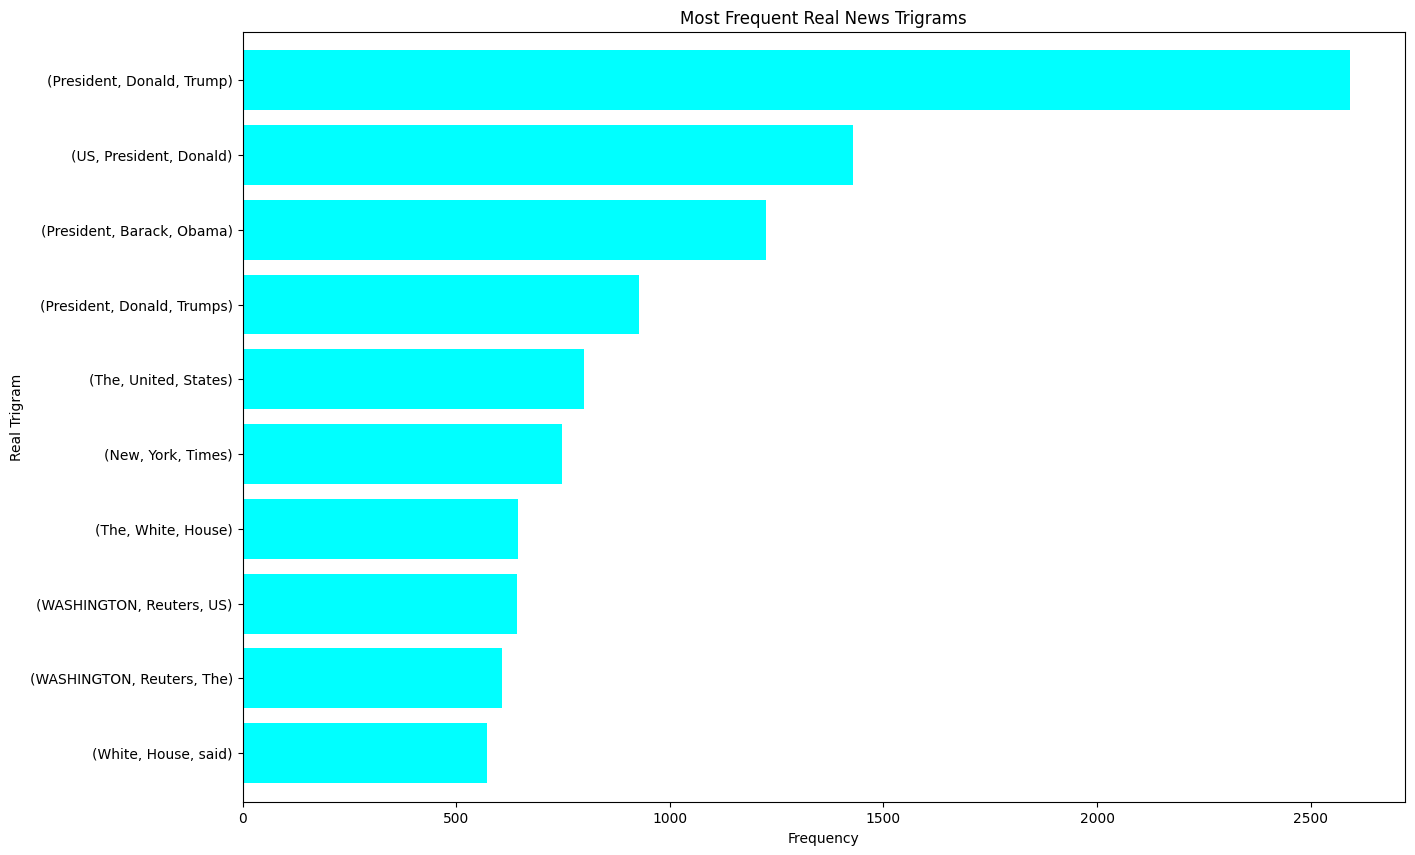

In [43]:
n_grams(realCloud, 'Real Trigram', 'Most Frequent Real News Trigrams', n=3)

In [45]:
# def set_seed(seed: int):
#     random.seed(seed)
#     np.random.seed(seed)
#     if is_torch_available():
#         torch.manual_seed(seed)
#         torch.cuda.manual_seed_all(seed)
#     if is_tf_available():
#         import tensorflow as tf
#         tf.random.set_seed(seed)
# set_seed(1)

In [46]:
from transformers import BertTokenizerFast

training_model = "bert-base-uncased"
max_doc_token_length = 512

bert_token = BertTokenizerFast.from_pretrained(training_model, do_lower_case=True)

In [129]:
#train_data

In [176]:
train_data

,text,class
0,Ever since Hillary Clinton generously yet corr...,0
1,WASHINGTON Reuters Presidentelect Donald Trump...,1
2,Paul Ryan Twitter chanting repeal replace proc...,0
3,WASHINGTON Reuters US Secretary State Rex Till...,1
4,WASHINGTON Reuters Fujifilm Medical Systems US...,1
...,...,...
49995,During Fridays Weekly Address President Trump ...,1
49996,Sources say Chris Christie offered several pos...,0
49997,Whoa We asked question yesterday tongueandchee...,0
49998,Videos New Lawsuit Challenges Efforts To Stamp...,0


In [40]:
train_data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30000 non-null  object
 1   class   30000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 57.0 MB


In [47]:
def data_set(train_data, test_size=0.1):
    
    texts = []
    labels = []
    
    for i in range(len(train_data)):
        
        text = train_data["text"].iloc[i]
        class1 =  train_data["class"].iloc[i]
        if text and class1 in [0, 1]:
            
            texts.append(text)
            labels.append(class1)
    return train_test_split(texts, labels, test_size=test_size)

training_texts, auth_texts, training_classes, auth_classes = data_set(train_data)
# classes = train_data.class
#training_classes, auth_classes, training_texts, auth_texts = train_test_split(train_data['text'], train_data['class'], test_size=0.1, random_state=10)

In [48]:
print(len(training_texts), len(training_classes))
print(len(auth_texts), len(auth_classes))

26828 26828
2981 2981


In [49]:
encoded_training = bert_token(training_texts, padding=True, truncation=True, max_length=max_doc_token_length)
encoded_auth = bert_token(auth_texts, padding=True, truncation=True, max_length=max_doc_token_length)

In [123]:
#print(encoded_training)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [50]:
# Converting encodings into a Dataset object
from torch.utils.data import Dataset

class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        
        self.encodings = encodings
        self.labels=labels
    
    def __getitem__(self, idx):
        item = {keys: torch.tensor(value[idx]) for keys, value in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item
    
    def __len__(self):
        return len(self.labels)


    
new_train_data = NewsDataset(encoded_training, training_classes)
new_auth_data = NewsDataset(encoded_auth, auth_classes)

In [51]:
#import tensorflow as tf
from transformers import BertForSequenceClassification, TFTrainer, TFTrainingArguments

def accuracy_metrics(predict):
    #ccuracy = accuracy_score(predict.class_ids, predict.predictions.argmax(-1))
    labels = predict.label_ids
    pred = predict.predictions.argmax(-1)
    
    accuracy = accuracy_score(labels, pred)
    
    return {"Accuracy": accuracy,}

new_train_model = BertForSequenceClassification.from_pretrained(training_model, num_labels=2)

# args = TrainingArguments(output_dir='./Training Output',
#                          logging_dir="./logs",
#                          logging_steps=100,
#                          per_device_train_batch_size=10,
#                          per_device_eval_batch_size=15,
#                          num_train_epochs=2,
#                          warmup_steps=200,
#                          evaluation_strategy="steps",
#                          save_steps=300,
#                          load_best_model_at_end=True,
#                          metric_for_best_model="accuracy",
#                          greater_is_better=True
# )

# news_trainer = Trainer(model=new_train_model, args=args, train_dataset=new_train_data, eval_dataset=new_auth_data, compute_metrics=accuracy_metrics)

# news_trainer.train()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [52]:
args = TrainingArguments(output_dir='./Training Output',
                         num_train_epochs=1,
                         per_device_train_batch_size=8,
                         per_device_eval_batch_size=20,
                         warmup_steps=200,
                         logging_dir='./logs',
                         logging_steps=100,
                         save_steps=200,
                         evaluation_strategy="steps",
                         load_best_model_at_end=True,
                         metric_for_best_model="accuracy",
                         greater_is_better=True
)

news_trainer = Trainer(model=new_train_model, args=args, train_dataset=new_train_data, eval_dataset=new_auth_data, compute_metrics=accuracy_metrics)

news_trainer.train()

c:\users\timio\appdata\local\programs\python\python37\lib\site-packages\transformers\optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 26828
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 3354
  Number of trainable parameters = 109483778


Step,Training Loss,Validation Loss,Accuracy
100,0.539500,0.353308,0.875545
200,0.323100,0.145485,0.953371
300,0.195400,0.155180,0.966119
400,0.174000,0.150339,0.969473
500,0.189000,0.125391,0.972828
600,0.157600,0.159833,0.963435
700,0.163400,0.139866,0.969809
800,0.167900,0.127464,0.970480
900,0.159600,0.108333,0.975847
1000,0.125800,0.100687,0.973163


***** Running Evaluation *****
  Num examples = 2981
  Batch size = 20
***** Running Evaluation *****
  Num examples = 2981
  Batch size = 20
Saving model checkpoint to ./Training Output\checkpoint-200
Configuration saved in ./Training Output\checkpoint-200\config.json
Model weights saved in ./Training Output\checkpoint-200\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2981
  Batch size = 20
***** Running Evaluation *****
  Num examples = 2981
  Batch size = 20
Saving model checkpoint to ./Training Output\checkpoint-400
Configuration saved in ./Training Output\checkpoint-400\config.json
Model weights saved in ./Training Output\checkpoint-400\pytorch_model.bin
***** Running Evaluation *****
  Num examples = 2981
  Batch size = 20
***** Running Evaluation *****
  Num examples = 2981
  Batch size = 20
Saving model checkpoint to ./Training Output\checkpoint-600
Configuration saved in ./Training Output\checkpoint-600\config.json
Model weights saved in ./Training Output\c

TrainOutput(global_step=3354, training_loss=0.1208636880134214, metrics={'train_runtime': 190536.935, 'train_samples_per_second': 0.141, 'train_steps_per_second': 0.018, 'total_flos': 7058743393198080.0, 'train_loss': 0.1208636880134214, 'epoch': 1.0})

In [4]:
news_trainer.evaluate()

NameError: name 'news_trainer' is not defined

In [57]:
trained_model_path = "fake-news-bert-base-uncased"
new_train_model.save_pretrained(trained_model_path)
bert_token.save_pretrained(trained_model_path)

Configuration saved in fake-news-bert-base-uncased\config.json
Model weights saved in fake-news-bert-base-uncased\pytorch_model.bin
tokenizer config file saved in fake-news-bert-base-uncased\tokenizer_config.json
Special tokens file saved in fake-news-bert-base-uncased\special_tokens_map.json


('fake-news-bert-base-uncased\\tokenizer_config.json',
 'fake-news-bert-base-uncased\\special_tokens_map.json',
 'fake-news-bert-base-uncased\\vocab.txt',
 'fake-news-bert-base-uncased\\added_tokens.json',
 'fake-news-bert-base-uncased\\tokenizer.json')

In [2]:
def news_pred(text, convert_to_label=False):
    news_in = bert_token(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    news_out = new_train_model(**news_in)
    probs = news_out[0].softmax(1)
    label = {0: "Fake", 1: "Real"}
    if convert_to_label:
        return label[int(probs.argmax())]
    else:
        return int(probs.argmax())

In [3]:
news_input = str(input())

news_pred(news_input, convert_to_label=True)

a man can fly


NameError: name 'bert_token' is not defined